1.	 Изучить зависимость структуры клиентов «ПОЛ-СТАЖ ВОЖДЕНИЯ» и частоту попадания в ДТП (для каждого типа ДТП) и сформулировать выводы.
2.	Изучить зависимости МАРКИ АВТО и СРЕДНЕЙ Выплаты по типам ДТП и сформулировать выводы.
3.	 Изучить влияет ли МАРКА АВТО на частоту попадания в ДТП и сформулировать выводы.
4.	 Изучить как изменяется «Средняя выплата» между клиентами с ЧАСТИЧНЫМ и ПОЛНЫМ тарифом на страхование по МАРКАМ АВТО.
5.  Дополнительный кейс #1: изучить взаимосвязь цены на автомобиль и средней выплаты по нему.
6.  Дополнительный кейс #2: изучить влияние факторов пол, возраст, стаж вождения на величину страховых выплат.

Импорт библиотек и их настройка

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as sps;

In [ ]:
pd.set_option('display.float_format', '{:.12g}'.format)
np.set_printoptions(precision = 3, suppress= True)

Вывод исходных данных

In [ ]:
df = pd.read_csv('./data.csv', sep = ';');
df

,Фамилия,Имя,Отчество,Пол,Возраст,Стаж вождения,Марка автомобиля,Тип страхования,Легкое ДТП,Крупное ДТП,"Угон, ДТП без востановления авто","Выплата, руб."
0,Иванов,Иван,Артемович,муж,23,4,Renault Duster,частичное,0,0,0,0
1,Козлова,Стася,Максимовна,жен,18,0,Lada 4x4,частичное,1,0,0,114112.7
2,Иванов,Владимир,Тимурович,муж,30,7,Lada 4x4,полное,0,0,0,0
3,Козлов,Богдан,Матвеевич,муж,32,3,Lada Granta,частичное,0,0,0,0
4,Смирнов,Иван,Алексеевич,муж,52,32,Lada Granta,полное,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9846,Григорьев,Денис,Тимофеевич,муж,19,1,Lada Granta,частичное,0,0,0,0
9847,Кузьмин,Роман,Тимофеевич,муж,34,15,Nissan X-Trail,частичное,1,0,0,15000
9848,Максимова,Милана,Евгеньевна,жен,66,44,Lada Vesta,частичное,0,0,0,0
9849,Кузнецова,Есения,Егоровна,жен,31,7,Hyundai Solaris,частичное,0,0,0,0


***Пункт #1***

**Таблица частот попадания граждан в ДТП в разрезе по возрасту**

In [ ]:
df_pt_agem = pd.pivot_table(df,
                        values = ['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'],
                        columns = 'Возраст',
                        fill_value = 0
                       );
pd.set_option('display.float_format', '{:.3g}'.format)
df_pt_agem.T

,Крупное ДТП,Легкое ДТП,"Угон, ДТП без востановления авто"
Возраст,,,
18,0.0167,0.35,0.0222
19,0.0325,0.325,0.00649
20,0.0471,0.341,0.00588
21,0.0125,0.344,0.0125
22,0.0305,0.305,0.0061
...,...,...,...
85,0,0.1,0.1
86,0,0,0
87,0,0.267,0.0667


**Таблица частот попадания мужчин и женщин в ДТП в разрезе по возрасту**

In [ ]:
df_pt_age = pd.pivot_table(df,
                        index = 'Пол',
                        values = ['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'],
                        columns = 'Возраст',
                        fill_value = 0
                       );
df_pt_age.T

Пол                                         жен    муж
                                 Возраст              
Крупное ДТП                      18           0 0.0254
                                 19           0 0.0532
                                 20      0.0435 0.0495
                                 21      0.0152 0.0106
                                 22      0.0156   0.04
...                                         ...    ...
Угон, ДТП без востановления авто 85       0.333      0
                                 86           0      0
                                 87           0    0.1
                                 88           0      0
                                 89           0      0

[216 rows x 2 columns]

**Таблица частот попадания граждан в ДТП в разрезе по стажу вождения**

In [ ]:
df_pt_stm = pd.pivot_table(df,
                        values = ['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'],
                        columns = 'Стаж вождения',
                        fill_value = 0
                       );
df_pt_stm.T

,Крупное ДТП,Легкое ДТП,"Угон, ДТП без востановления авто"
Стаж вождения,,,
0,0.0251,0.324,0.0103
1,0.0392,0.309,0.0049
2,0.0146,0.325,0.00365
3,0.0427,0.303,0.00948
4,0.0167,0.335,0.00418
...,...,...,...
66,0,0.167,0
67,0,0.5,0
68,0,0.25,0


**Таблица частот попадания мужчин и женщин в ДТП в разрезе по стажу вождения**

---



In [ ]:
df_pt_st = pd.pivot_table(df,
                        index = 'Пол',
                        values = ['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'],
                        columns = 'Стаж вождения',
                        fill_value = 0
                       );
df_pt_st = df_pt_st.T
df_pt_st

Пол                                                жен     муж
                                 Стаж вождения                
Крупное ДТП                      0             0.00943   0.034
                                 1              0.0375  0.0403
                                 2              0.0227 0.00704
                                 3              0.0149  0.0556
                                 4                   0  0.0244
...                                                ...     ...
Угон, ДТП без востановления авто 66                  0       0
                                 67                  0       0
                                 68                  0       0
                                 69                  0       0
                                 70                  0       0

[213 rows x 2 columns]

**Частота попадания граждан в ДТП в разрезе по возрасту**

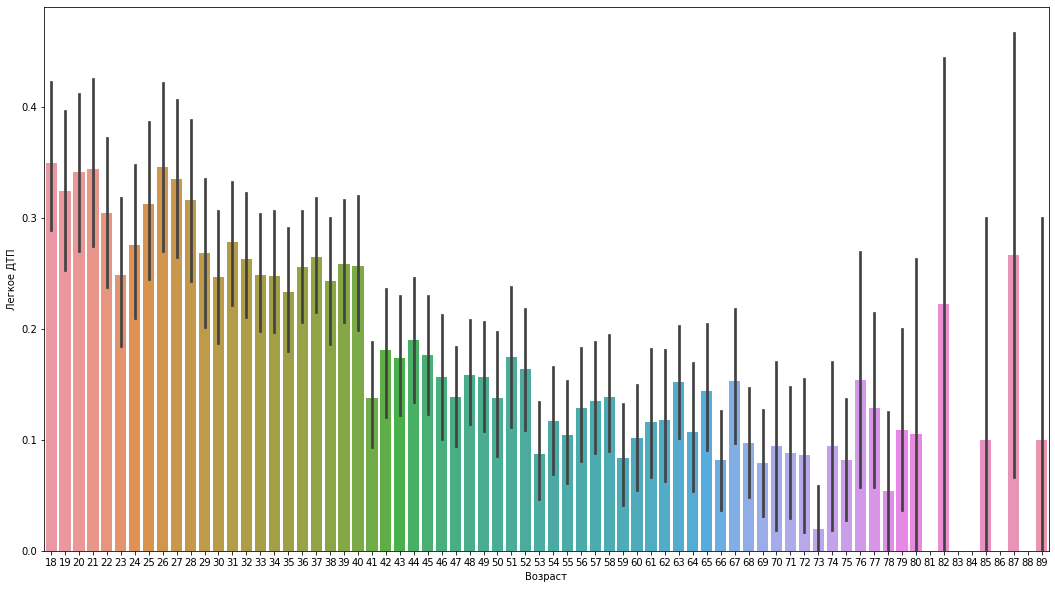

In [ ]:
# ax = df_pt_agem.T.plot(kind = 'bar');
# ylab = ax.set_ylabel("Частота попадания в ДТП");
# ax.set_xscale("linear");
plt.rcParams['figure.figsize'] = (18, 10);
sns.barplot(x = 'Возраст', y = 'Легкое ДТП', data = df);

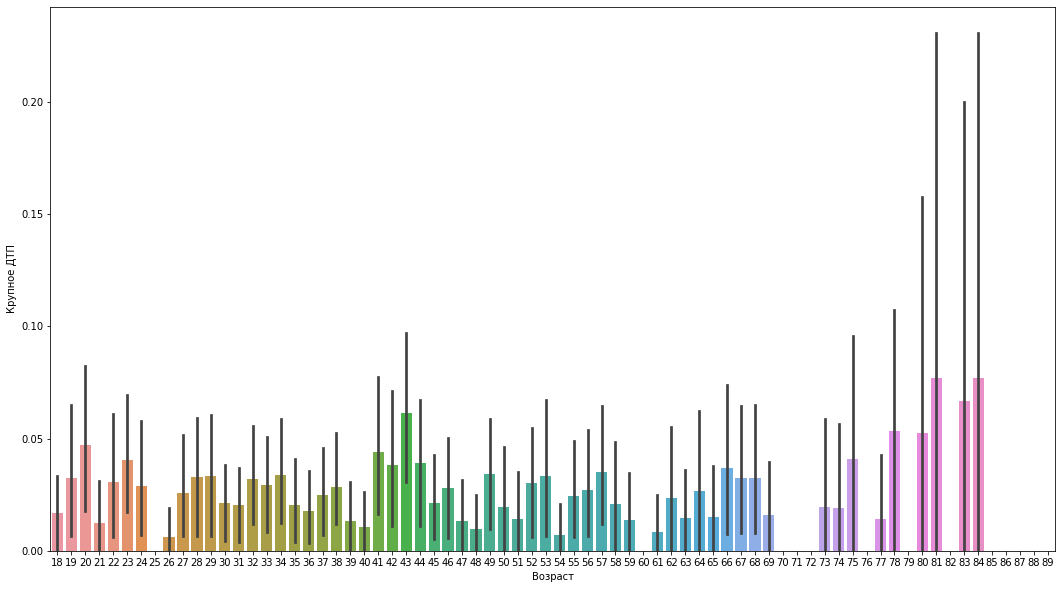

In [ ]:
sns.barplot(x = 'Возраст', y = 'Крупное ДТП', data = df);

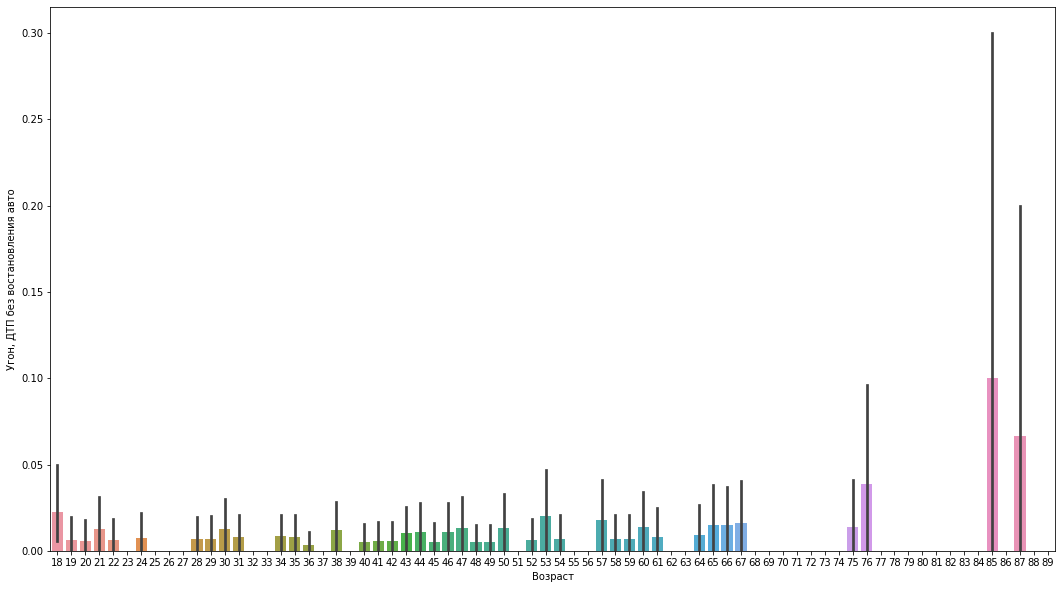

In [ ]:
sns.barplot(x = 'Возраст', y = 'Угон, ДТП без востановления авто', data = df);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


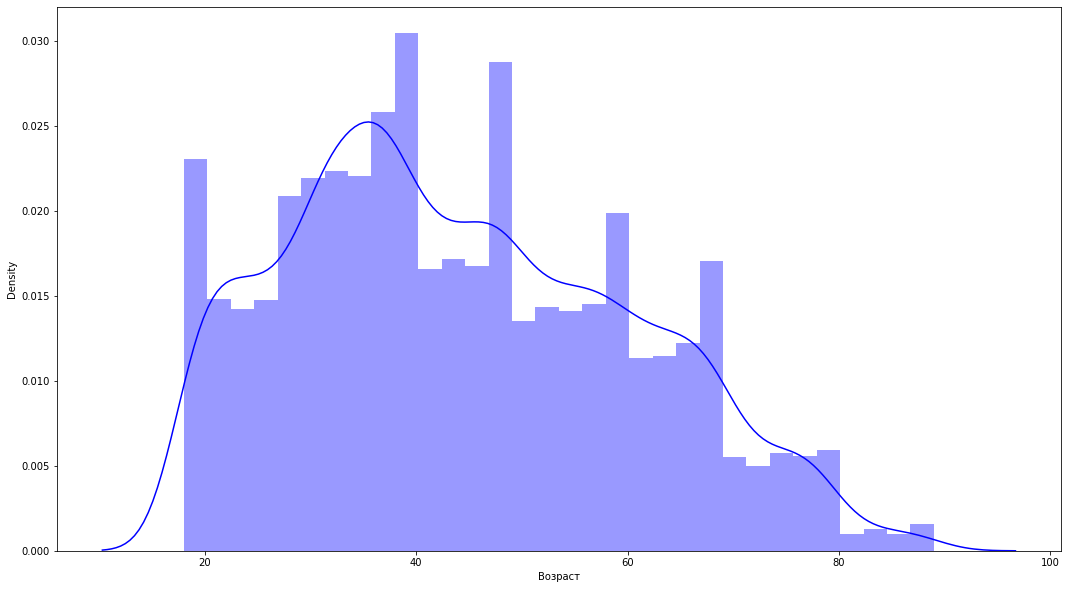

In [ ]:
df_cut = df[['Возраст', 'Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто']];
sns.distplot(df_cut['Возраст'], color = 'blue');

**Частота попадания граждан в ДТП в разрезе по стажу вождения**

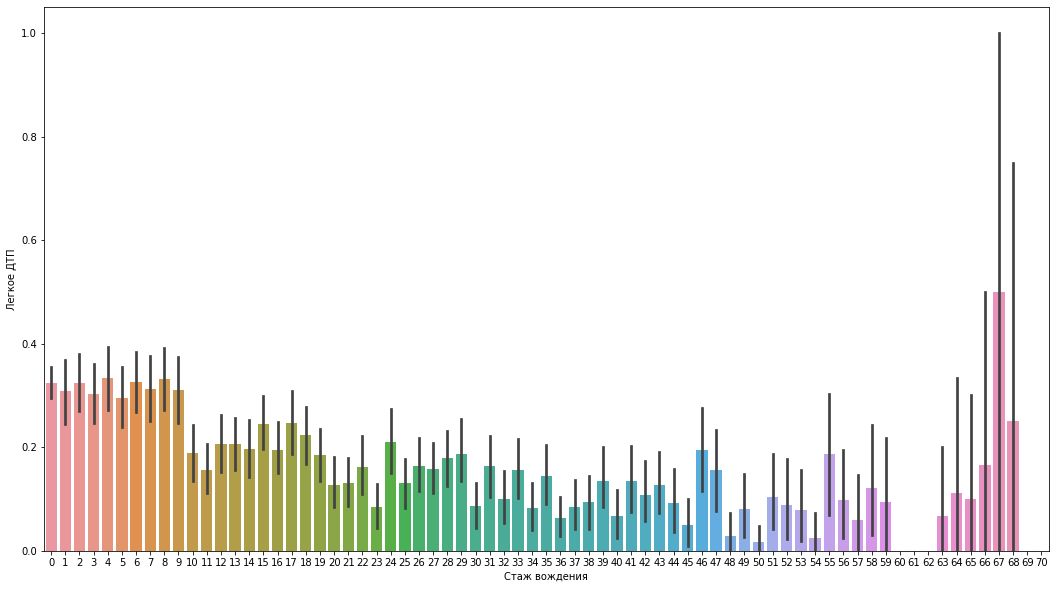

In [ ]:
sns.barplot(x = 'Стаж вождения', y = 'Легкое ДТП', data = df);

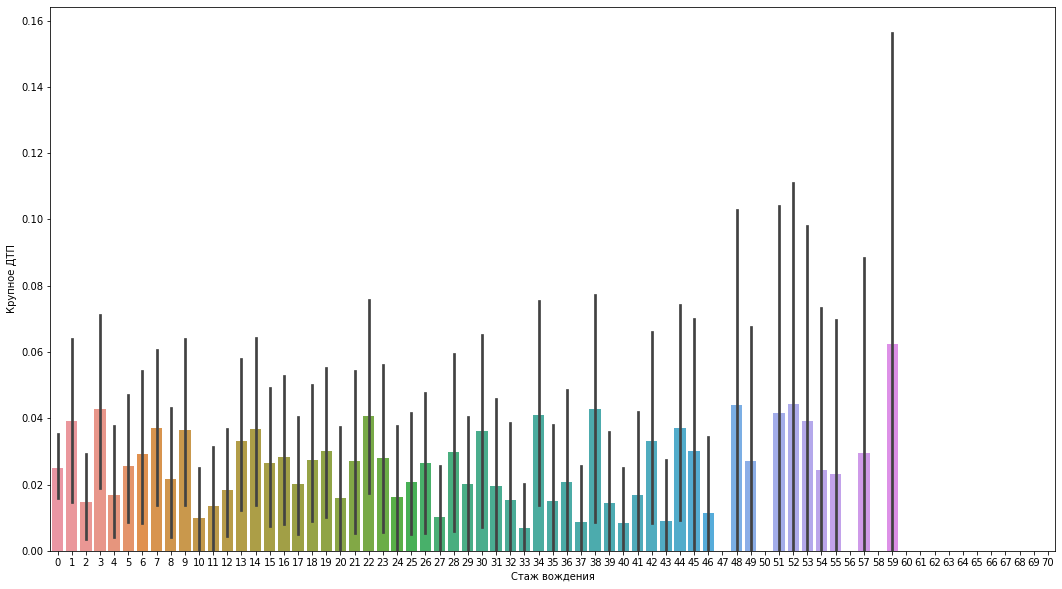

In [ ]:
sns.barplot(x = 'Стаж вождения', y = 'Крупное ДТП', data = df);

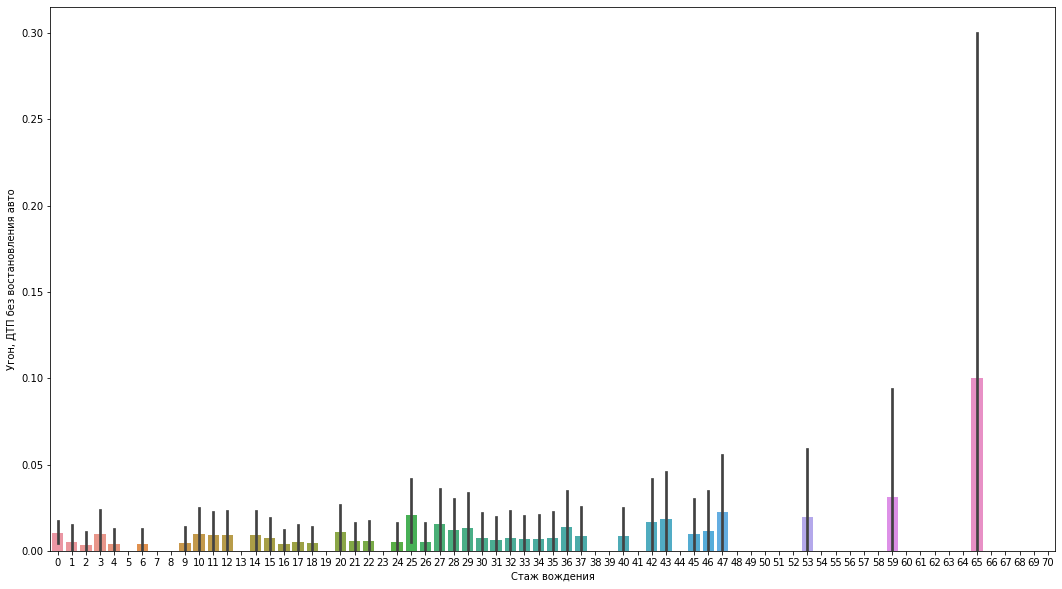

In [ ]:
sns.barplot(x = 'Стаж вождения', y = 'Угон, ДТП без востановления авто', data = df);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


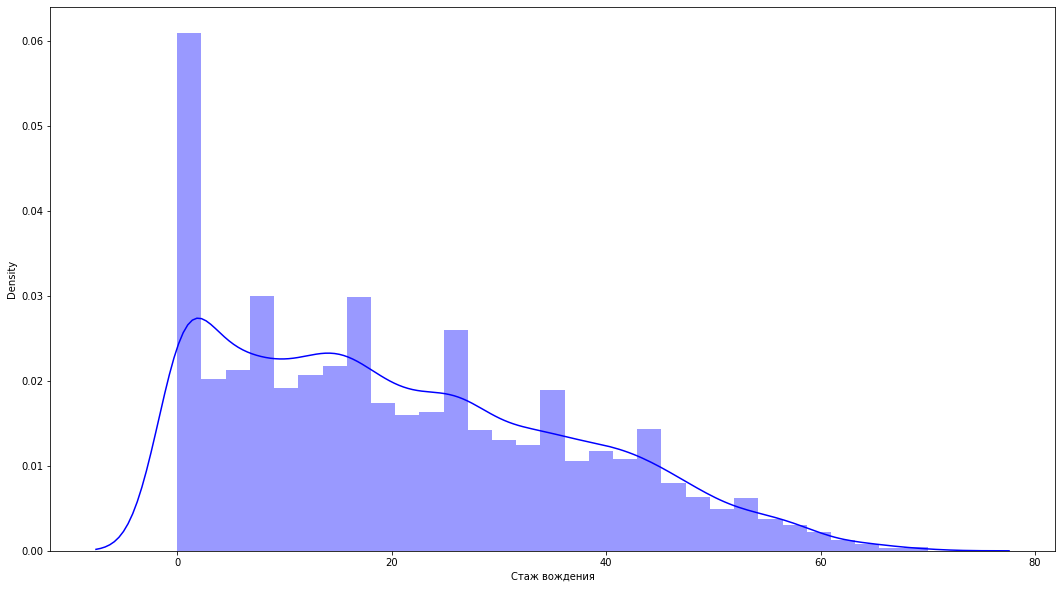

In [ ]:
df_cut = df[['Стаж вождения', 'Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто']];
sns.distplot(df_cut['Стаж вождения'], color = 'blue');

**Частота попадания мужчин и женщин в легкое ДТП в разрезе по возрасту**

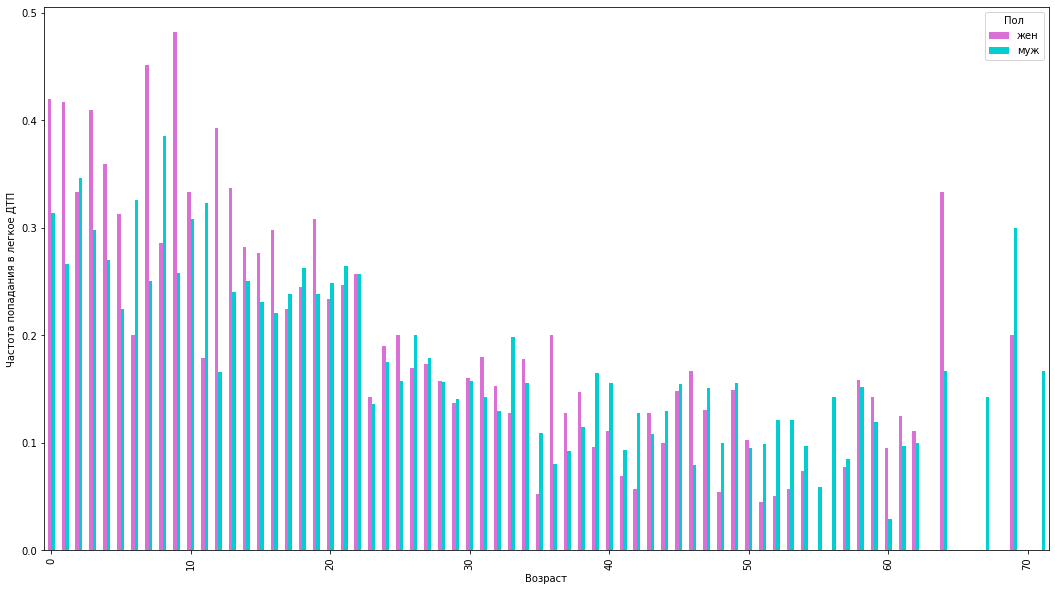

In [ ]:
ax = df_pt_age['Легкое ДТП'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
ylab = ax.set_ylabel("Частота попадания в легкое ДТП");
ax.set_xscale("linear");

**Частота попадания мужчин и женщин в легкое ДТП в разрезе по стажу вождения**

In [ ]:
# ax = df_pt_st['Легкое ДТП'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
# ylab = ax.set_ylabel("Частота попадания в легкое ДТП");
# ax.set_xscale("linear");

**Частота попадания мужчин и женщин в крупное ДТП в разрезе по возрасту**

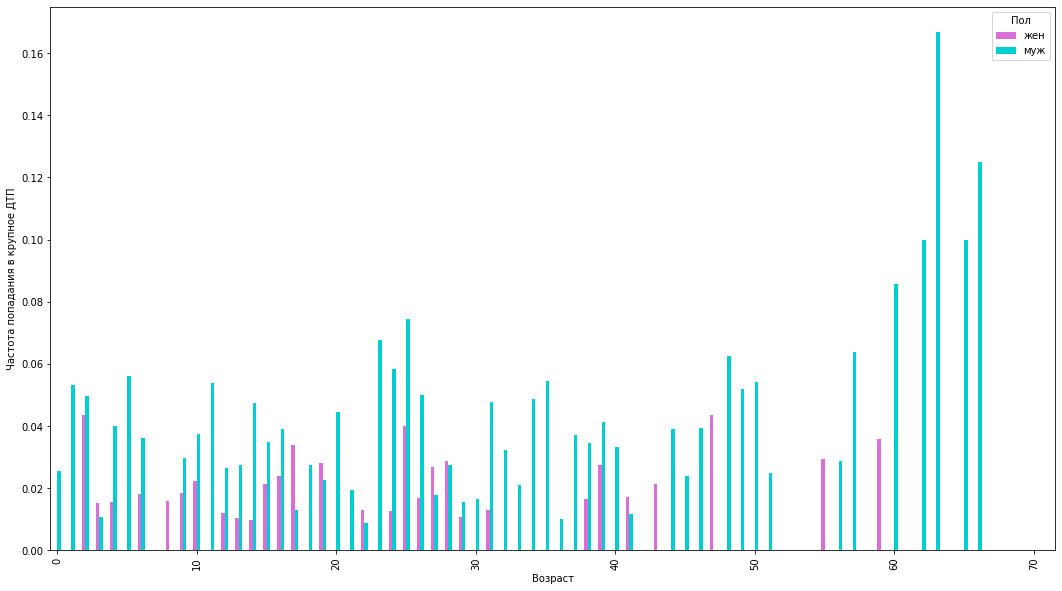

In [ ]:
ax = df_pt_age['Крупное ДТП'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
ylab = ax.set_ylabel("Частота попадания в крупное ДТП");
ax.set_xscale("linear");

**Частота попадания мужчин и женщин в крупное ДТП в разрезе по стажу вождения**

In [ ]:
# ax = df_pt_st['Крупное ДТП'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
# ylab = ax.set_ylabel("Частота попадания в крупное ДТП");
# ax.set_xscale("linear");

**Частота попадания мужчин и женщин в ДТП без восстановления авто/угона в разрезе по возрасту**

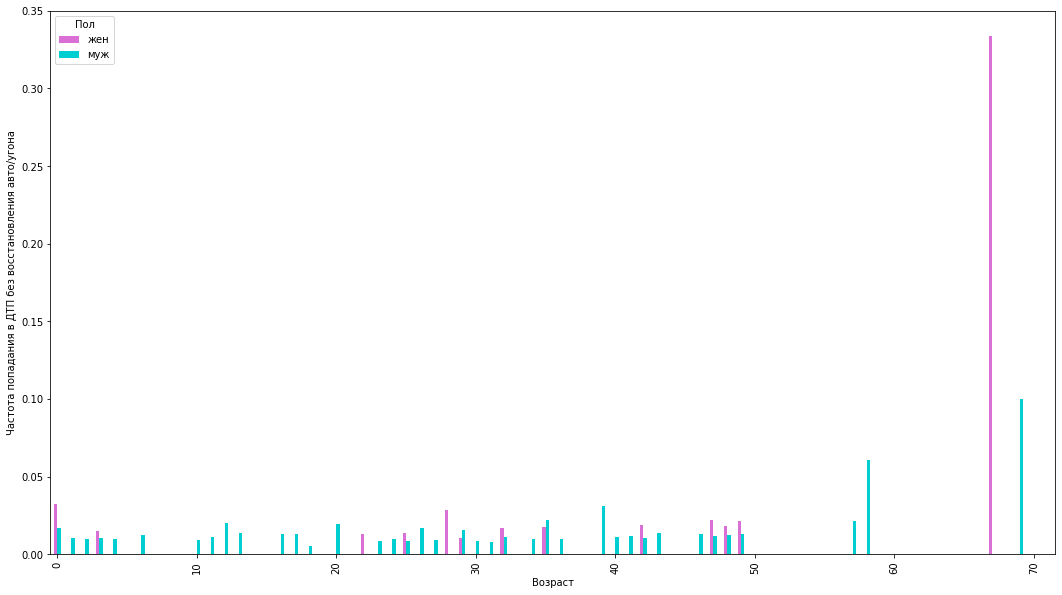

In [ ]:
ax = df_pt_age['Угон, ДТП без востановления авто'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
ylab = ax.set_ylabel("Частота попадания в ДТП без восстановления авто/угона");
ax.set_xscale("linear");

**Частота попадания мужчин и женщин в ДТП без восстановления авто/угона в разрезе по стажу вождения**

In [ ]:
# ax = df_pt_st['Угон, ДТП без востановления авто'].T.plot(kind = 'bar', color = ['orchid', 'darkturquoise']);
# ylab = ax.set_ylabel("Частота попадания в ДТП без восстановления авто/угона");
# ax.set_xscale("linear");

***Пункт #2***

**Средняя выплата по всем видам ДТП в разрезе по маркам авто**

---



In [ ]:
df['ДТП'] = df[['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто']].idxmax(axis = 1);
df_pt_sv = pd.pivot_table(df,
                        index = 'Марка автомобиля',
                        values = ['Выплата, руб.'],
                        columns = 'ДТП',
                        aggfunc = np.mean,
                        fill_value = 0
                       );
pd.set_option('display.float_format', '{:.12g}'.format)
df_pt_sv
# df_pt_sv.droplevel(level=0, axis=1).sort_values('Легкое ДТП', ascending=False)
df_pt_sv_cut = df_pt_sv.droplevel(level=0, axis=1).sort_values('Крупное ДТП', ascending=False)
df_pt_sv_cut
# df_pt_sv.droplevel(level=0, axis=1).sort_values('Угон, ДТП без востановления авто', ascending=False)

ДТП,Крупное ДТП,Легкое ДТП,"Угон, ДТП без востановления авто"
Марка автомобиля,,,
Toyota Camry,707379.466667,21780.2484127,0
Mazda CX-5,702828.95,16809.5450262,2268504.4
KIA Sportage,561618.266667,21675.408,0
Toyota RAV 4,519223.5,21003.7160671,1227712.6
VW Tiguan,512942.3875,20909.553125,0
Nissan Qashqai,504177.95,14706.1475,0
Hyundai Creta,498345.092308,23299.319,0
Nissan X-Trail,454249.466667,16708.616875,0
Skoda Octavia A7,290692.875,16413.656917,924003.35


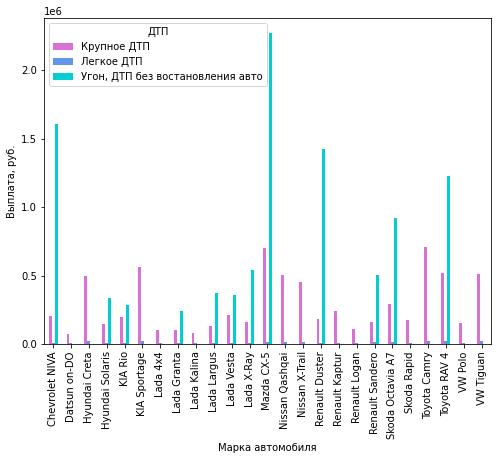

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6);
ax = df_pt_sv.droplevel(level = 0, axis = 1).plot(kind = 'bar', color = ['orchid', 'cornflowerblue', 'darkturquoise']);
ylab = ax.set_ylabel("Выплата, руб.");

In [ ]:
df_pt_sv_cut['mean_r'] = pd.Series();
for i in range(df_pt_sv_cut.shape[0]):
  df_pt_sv_cut['mean_r'][i] = (df_pt_sv_cut['Легкое ДТП'][i] + df_pt_sv_cut['Крупное ДТП'][i] + df_pt_sv_cut['Угон, ДТП без востановления авто'][i]) / 3;
new_df = df_pt_sv_cut.drop(['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'], axis = 1).reset_index('Марка автомобиля')
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


ДТП,Марка автомобиля,mean_r
0,Toyota Camry,243053.23836
1,Mazda CX-5,996047.631675
2,KIA Sportage,194431.224889
3,Toyota RAV 4,589313.272022
4,VW Tiguan,177950.646875
5,Nissan Qashqai,172961.365833
6,Hyundai Creta,173881.470436
7,Nissan X-Trail,156986.027847
8,Skoda Octavia A7,410369.960639
9,Renault Kaptur,84122.8587012


Средняя выплата по всем видам ДТП в совокупности в разрезе по маркам авто

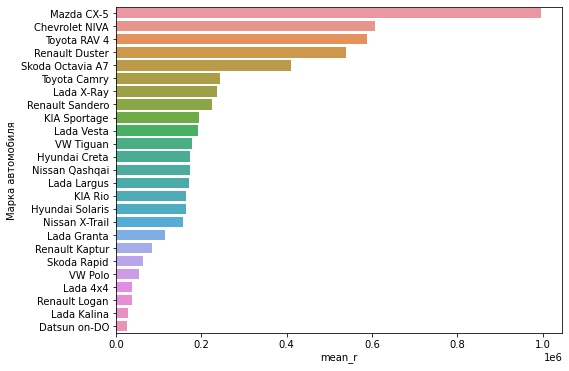

In [ ]:
sns.barplot(data = new_df.sort_values(by = 'mean_r', ascending = False), x = 'mean_r', y = 'Марка автомобиля');

Проверим зависимость средней выплаты при наступлении страховго случая от стоимости автомобиля

In [ ]:
df_price = pd.read_csv('./ar_price_data.csv', sep = ',');
df_price

,car,mean,median
0,Renault Duster,1175947.90522,1255200
1,Lada 4x4,424554.752399,418000
2,Lada Granta,459319.973529,435000
3,Datsun on-DO,414979.382353,400500
4,KIA Rio,825655.284722,870000
5,Hyundai Solaris,747420.685714,695000
6,Renault Logan,679219.909434,645017
7,Toyota Camry,1739079.41652,1370000
8,VW Polo,985698.021552,1099550
9,Hyundai Creta,1333856.40541,1345000


Разбиение множества автомобилей на классы (эконом, средний, элитный)

---



In [ ]:
car_price = pd.Series(df_price['mean']);
car_price = pd.qcut(car_price, 3).to_frame().drop_duplicates().sort_values(by = 'mean');

econom = []; # авто класса эконом
for i in range(df_price.shape[0]):
  if (df_price['mean'][i] in car_price['mean'][1]):
    econom.append(df_price['car'][i]);

middle = []; # авто среднего класса
for i in range(df_price.shape[0]):
  if (df_price['mean'][i] in car_price['mean'][0]):
    middle.append(df_price['car'][i]);

business = []; # авто класса бизнес
for i in range(df_price.shape[0]):
  if (df_price['mean'][i] in car_price['mean'][7]):
    business.append(df_price['car'][i]);

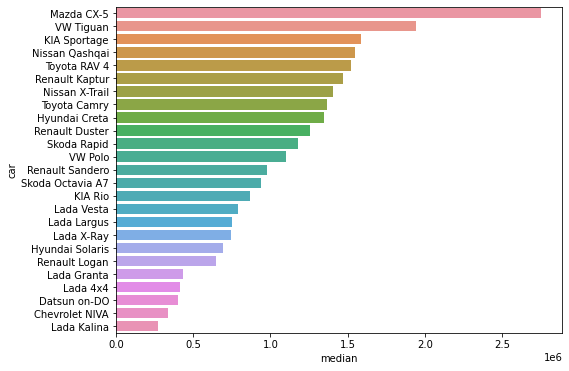

In [ ]:
df_price_cut = df_price.drop('mean', axis = 1);
df_price_cut
sns.barplot(data = df_price_cut.sort_values(by = 'median', ascending = False), x = 'median', y = 'car');

Видим, что чем дороже стоиомсть автомобиля, тем реже данный автомобиль фигурирует в ДТП

***Пункт #3***

**Частота ДТП в разрезе по маркам авто**

In [ ]:
df_pt_cm = pd.pivot_table(df,
                        index = 'Марка автомобиля',
                        values = ['Легкое ДТП', 'Крупное ДТП', 'Угон, ДТП без востановления авто'],
                        fill_value = 0
                       );
pd.set_option('display.float_format', '{:.3g}'.format)
df_pt_cm

,Крупное ДТП,Легкое ДТП,"Угон, ДТП без востановления авто"
Марка автомобиля,,,
Chevrolet NIVA,0.0337,0.224,0.00307
Datsun on-DO,0.00935,0.22,0.00467
Hyundai Creta,0.0252,0.229,0.00581
Hyundai Solaris,0.0374,0.192,0.0116
KIA Rio,0.0189,0.197,0.0122
KIA Sportage,0.029,0.181,0.00323
Lada 4x4,0.0374,0.187,0
Lada Granta,0.0211,0.198,0.00767
Lada Kalina,0.0275,0.204,0.00392


**Частота легкого ДТП в разрезе по маркам авто**

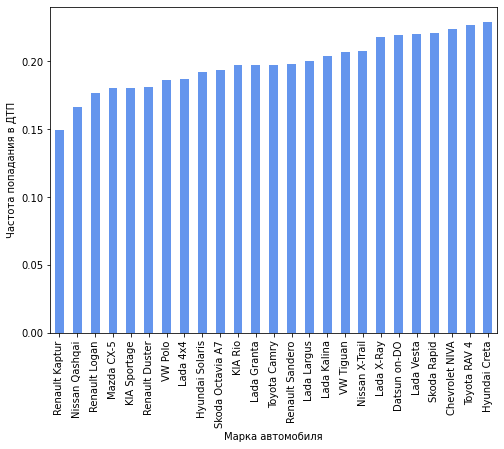

In [ ]:
ax = (df_pt_cm['Легкое ДТП'].sort_values()).T.plot(kind = 'bar', color = 'cornflowerblue');
ylab = ax.set_ylabel("Частота попадания в ДТП");

**Частота крупного ДТП в разрезе по маркам авто**

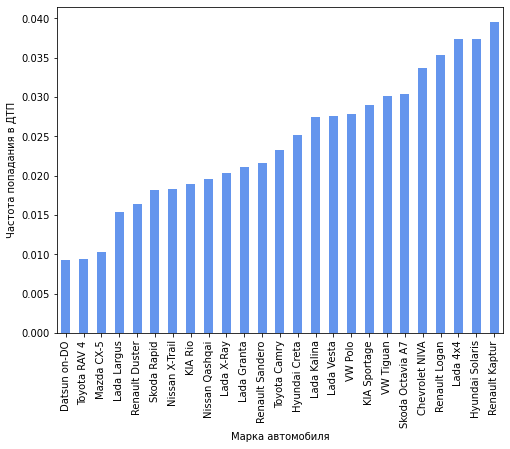

In [ ]:
ax = (df_pt_cm['Крупное ДТП'].sort_values()).T.plot(kind = 'bar', color = 'cornflowerblue');
ylab = ax.set_ylabel("Частота попадания в ДТП");

**Частота угона, ДТП без восстановления авто в разрезе по маркам авто**

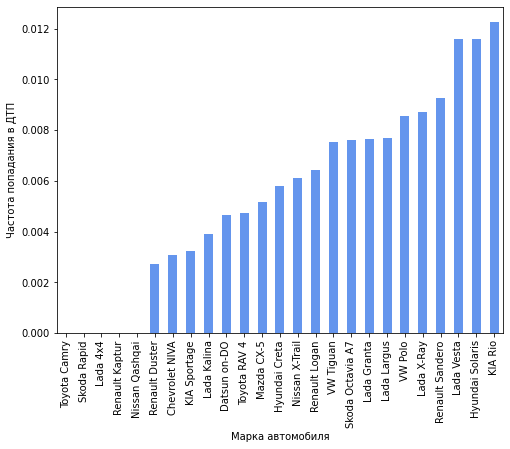

In [ ]:
ax = (df_pt_cm['Угон, ДТП без востановления авто'].sort_values()).T.plot(kind = 'bar', color = 'cornflowerblue');
ylab = ax.set_ylabel("Частота попадания в ДТП");

***Пункт #4***

**Средняя выплата между клиентами с частичным и полным тарифами на страхование по маркам авто**


In [ ]:
df_pt_svts = pd.pivot_table(df,
                            index = 'Марка автомобиля',
                            values = 'Выплата, руб.',
                            columns = 'Тип страхования',
                            aggfunc = np.mean
                           );
pd.set_option('display.float_format', '{:.12g}'.format)
df_pt_svts

Тип страхования,полное,частичное
Марка автомобиля,,
Chevrolet NIVA,42063.8213592,12535.270852
Datsun on-DO,6752.0220339,5528.26322581
Hyundai Creta,29206.2159509,37868.3640227
Hyundai Solaris,27298.9422222,14822.5907273
KIA Rio,24339.2193309,12855.2553259
KIA Sportage,52054.246,30246.4866667
Lada 4x4,12338.2744681,13642.1415
Lada Granta,12713.6901587,6534.16085165
Lada Kalina,7216.64418605,8724.62485207


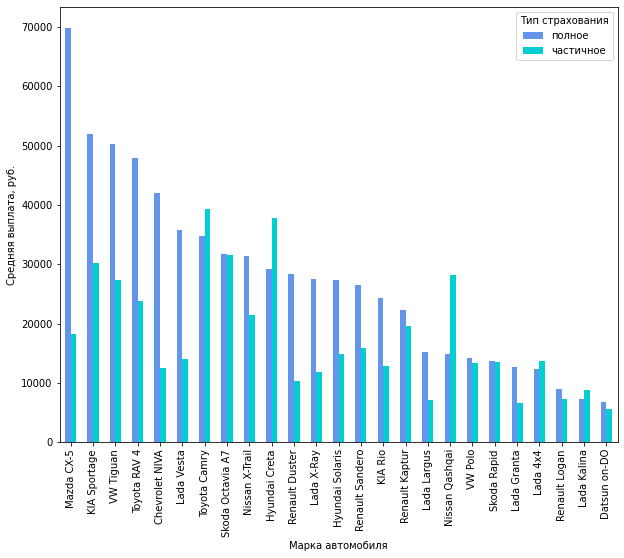

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8);
ax = (df_pt_svts.sort_values(by = 'полное', ascending = False)).plot(kind = 'bar', color = ['cornflowerblue', 'darkturquoise']);
ylab = ax.set_ylabel("Средняя выплата, руб.");

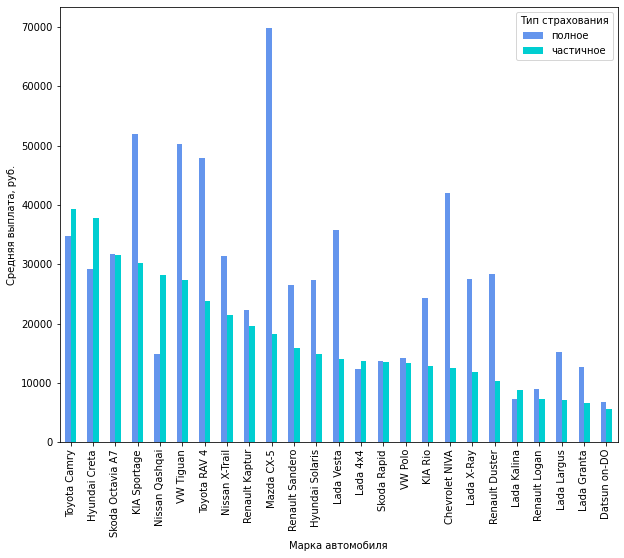

In [ ]:
ax = (df_pt_svts.sort_values(by = 'частичное', ascending = False)).plot(kind = 'bar', color = ['cornflowerblue', 'darkturquoise']);
ylab = ax.set_ylabel("Средняя выплата, руб.");

Средняя выплата по легкому ДТП между клиентами с полным и частичным тарифами на страхование

---



In [ ]:
df_cut = df.drop(df[df['Легкое ДТП'] == 0].index);
df_pt_svts = pd.pivot_table(df_cut,
                            index = 'Марка автомобиля',
                            values = 'Выплата, руб.',
                            columns = 'Тип страхования',
                            aggfunc = np.mean
                           );
pd.set_option('display.float_format', '{:.12g}'.format)
df_pt_svts

Тип страхования,полное,частичное
Марка автомобиля,,
Chevrolet NIVA,50760.36,43045.2735849
Datsun on-DO,19854.35,25208.5090909
Hyundai Creta,87303.6088235,103349.247619
Hyundai Solaris,46232.365,48232.5880734
KIA Rio,37916.4693878,48788.3804687
KIA Sportage,98454.16,130363.496774
Lada 4x4,45834.0470588,52521.1
Lada Granta,25897.6310345,20782.4317568
Lada Kalina,30373.6769231,29572.2615385


In [ ]:
df_pt_svts.columns.name = None
df_pt_svts = df_pt_svts.reset_index() # не перезапускать повторно этот кусок

Средняя выплата по легкому ДТП между клиентами с полным и частичным тарифами на страхование в разрезе по классам авто

---



In [ ]:
k1 = []; # массив сумм
for i in range(3):
  k1.append([0] * 2);
n1 = [0, 0, 0]; # массив количеств

for i in range(df_pt_svts.shape[0]):
  if (df_pt_svts['Марка автомобиля'][i] in econom):
    k1[0][0] += df_pt_svts['полное'][i];
    k1[0][1] += df_pt_svts['частичное'][i];
    n1[0] += 1;
  elif (df_pt_svts['Марка автомобиля'][i] in middle):
    k1[1][0] += df_pt_svts['полное'][i];
    k1[1][1] += df_pt_svts['частичное'][i];
    n1[1] += 1;
  else:
    k1[2][0] += df_pt_svts['полное'][i];
    k1[2][1] += df_pt_svts['частичное'][i];
    n1[2] += 1;

k1[0][0] /= n1[0];
k1[0][1] /= n1[0];
k1[1][0] /= n1[1];
k1[1][1] /= n1[1];
k1[2][0] /= n1[2];
k1[2][1] /= n1[2];

Средняя выплата по крупному ДТП между клиентами с полным и частичным тарифами на страхование

---



In [ ]:
df_cut = df.drop(df[df['Крупное ДТП'] == 0].index);
df_pt_svts = pd.pivot_table(df_cut,
                            index = 'Марка автомобиля',
                            values = 'Выплата, руб.',
                            columns = 'Тип страхования',
                            aggfunc = np.mean
                           );
pd.set_option('display.float_format', '{:.12g}'.format)
df_pt_svts

Тип страхования,полное,частичное
Марка автомобиля,,
Chevrolet NIVA,244576.028571,128491.475
Datsun on-DO,120408.4,25000
Hyundai Creta,597430.166667,468619.57
Hyundai Solaris,155870,137860.609524
KIA Rio,217259.657143,184104.29
KIA Sportage,686017.65,462098.76
Lada 4x4,190309.5,81402.9444444
Lada Granta,95806.6,105066.825
Lada Kalina,225773.6,53523.9


Средняя выплата по угону/ДТП без восстановления авто между клиентами с полным и частичным тарифами на страхование

---



In [ ]:
df_cut = df.drop(df[df['Угон, ДТП без востановления авто'] == 0].index);
df_pt_svts = pd.pivot_table(df_cut,
                            index = 'Марка автомобиля',
                            values = 'Выплата, руб.',
                            columns = 'Тип страхования',
                            aggfunc = np.mean
                           );
pd.set_option('display.float_format', '{:.12g}'.format)
df_pt_svts

Тип страхования,полное,частичное
Марка автомобиля,,
Chevrolet NIVA,1605334.2,nan
Datsun on-DO,nan,0
Hyundai Creta,nan,0
Hyundai Solaris,1523003.7,0
KIA Rio,1584262.7,0
KIA Sportage,nan,0
Lada Granta,963955.1,0
Lada Kalina,nan,0
Lada Largus,1124268.4,0


**VaR, ES (легкое ДТП)**

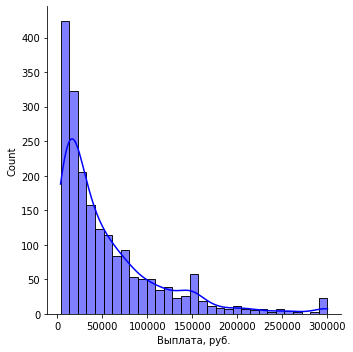

In [ ]:
df_cut = df.drop(df[df['Легкое ДТП'] == 0].index);
x = pd.Series(df_cut['Выплата, руб.'], name = "Выплата, руб.");
sns.displot(x, kde = True, color='blue');

Выплата по легкому ДТП имеет экспоненциальное распределение, поэтому расчитаем VaR, используя набор данных, распределенных по экспоненциальному закону

In [ ]:
mu = np.mean(x);
std_dev = np.std(x);

print(f"МО: {round(mu, 3)}\nСКО: {round(std_dev, 3)}");

# from scipy.stats import expon;
# VaR_95 = round(expon.ppf(1 - 0.95, mu, std_dev), 3);
# VaR_95

МО: 55435.002
СКО: 57806.201


**VaR (95%)**

In [ ]:
VaR_95 = round(np.quantile(x, 0.95), 3);
print(f"VaR_0,95 = {VaR_95}");

VaR_0,95 = 165908.52


Величина, которую не превысит выплата по легкому ДТП с вероятностью 95%, составляет 165908,5 руб., т.е. страховщику необходимо резервировать средства в размере 165908,5 руб. для того, чтобы покрыть среднестатистический убыток при наступлении страховых случаев (в данном случае - легкого ДТП) и сформировать страховые резервы

**ES (95%)**

In [ ]:
# tail_loss = expon.expect(lambda z: z, loc = mu, scale = std_dev, lb = VaR_95);
# ES_95 = (1 / (1 - 0.95)) * tail_loss;
# ES_95

CVaR_95 = round(x[x > VaR_95].mean(), 3);
print(f"CVaR_0,95 = {CVaR_95}");

CVaR_0,95 = 231740.323


Величина возможного ожидаемого убытка страховщика из-за выплат по легкому ДТП в 5% случаев может составлять в среднем 231740,3 руб., т.е. страховщику необходимо резервировать средства в размере 231740,3 руб. для покрытия случайных отклонений от среднестатистического убытка от наступления страховых случаев (легкого ДТП) (включая сам среднестатистический убыток) и формирования страховых резервов

**Рисковая надбавка в случае легкого ДТП**

In [ ]:
print(f"Величина рисковой надбавки в случае легкого ДТП составит {CVaR_95} - {VaR_95} = {round(CVaR_95 - VaR_95, 3)} руб.")

Величина рисковой надбавки в случае легкого ДТП составит 231740.323 - 165908.52 = 65831.803 руб.


*Проверка гипотезы о зависимости величины, которую не превысит выплата по легкому ДТП с вероятностью 95%, от пола:*

In [ ]:
df_cut = df.drop(df[df['Легкое ДТП'] == 0].index);
new_df = pd.DataFrame([df_cut['Пол'], df_cut['Выплата, руб.']]).T;

mu_m = new_df['Выплата, руб.'][new_df['Пол'] == "муж"].mean();
lmbd_m = 1 / mu_m;

mu_w = new_df['Выплата, руб.'][new_df['Пол'] == "жен"].mean();
lmbd_w = 1 / mu_w;

print(f"МО жен = {round(mu_w, 3)}\nМО муж = {round(mu_m, 3)}");

МО жен = 53520.663
МО муж = 56689.28


In [ ]:
import random as rnd

In [ ]:
rand_nums = [rnd.expovariate(lambd = lmbd_w) for i in range(2000)];
experiment_gender = pd.DataFrame(rand_nums, columns = ['жен']);
experiment_gender['муж'] = [rnd.expovariate(lambd = lmbd_m) for i in range(2000)];
experiment_gender['жен > муж'] = pd.Series();
for i in range(2000):
  experiment_gender['жен > муж'][i] = np.where(experiment_gender['жен'][i] > experiment_gender['муж'][i], 1, 0);
experiment_gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,жен,муж,жен > муж
0,12618.3301293,26630.1533045,0
1,20992.718197,85540.1113701,0
2,8611.79784978,44884.0397386,0
3,14477.4698769,221041.405933,0
4,70758.4810469,12779.0664632,1
...,...,...,...
1995,7297.73639352,14916.3698862,0
1996,45395.6053228,32220.9355937,1
1997,653.763848442,4393.37525654,0
1998,84598.757191,23167.7903423,1


In [ ]:
kol_w = experiment_gender['жен > муж'].sum();
print(f"Количество случаев для женщин: {int(kol_w)}\nКоличество случаев для мужчин: {int(2000 - kol_w)}");

Количество случаев для женщин: 937
Количество случаев для мужчин: 1063


Если перезапускать два предыдущих блока кода по новой, будем получать новые наборы из двух тысяч экспоненциально распределенных чисел, однако конечный результат меняться не будет: соотношение случаев для женщин и мужчин всегда равно примерно 50/50

*Проверка гипотезы о зависимости величины, которую не превысит выплата по легкому ДТП с вероятностью 95%, от типа страхования (частичное/полное):*

In [ ]:
df_cut = df.drop(df[df['Легкое ДТП'] == 0].index);
new_df = pd.DataFrame([df_cut['Тип страхования'], df_cut['Выплата, руб.']]).T;
new_df

mu_ps = new_df['Выплата, руб.'][new_df['Тип страхования'] == "частичное"].mean();
lmbd_ps = 1 / mu_ps;

mu_fs = new_df['Выплата, руб.'][new_df['Тип страхования'] == "полное"].mean();
lmbd_fs = 1 / mu_fs;

print(f"МО частичное = {round(mu_ps, 3)}\nМО полное = {round(mu_fs, 3)}");

МО частичное = 55285.024
МО полное = 55801.442


In [ ]:
rand_nums = [rnd.expovariate(lambd = lmbd_ps) for i in range(2000)];
experiment_insurance = pd.DataFrame(rand_nums, columns = ['частичное']);
experiment_insurance['полное'] = [rnd.expovariate(lambd = lmbd_fs) for i in range(2000)];
experiment_insurance['частичное > полное'] = pd.Series();
for i in range(2000):
  experiment_insurance['частичное > полное'][i] = np.where(experiment_insurance['частичное'][i] > experiment_insurance['полное'][i], 1, 0);
experiment_insurance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,частичное,полное,частичное > полное
0,16781.464678,5701.40663321,1
1,59194.314777,4487.99197295,1
2,5476.39583579,165388.173862,0
3,14708.4229443,12811.7009784,1
4,70951.9088241,26686.9422695,1
...,...,...,...
1995,48740.7872087,259696.590489,0
1996,36490.4924779,1337.03837642,1
1997,7391.04768103,275622.813276,0
1998,17241.0459813,227536.861143,0


In [ ]:
kol_ps = experiment_insurance['частичное > полное'].sum();
print(f"Количество случаев для частичного типа страхования: {int(kol_ps)}\nКоличество случаев для полного типа страхования: {int(2000 - kol_ps)}");

Количество случаев для частичного типа страхования: 985
Количество случаев для полного типа страхования: 1015


Если перезапускать два предыдущих блока кода по новой, будем получать новые наборы из двух тысяч экспоненциально распределенных чисел, однако конечный результат меняться не будет: соотношение случаев для частичного типа страхования и полного типа страхования всегда равно примерно 50/50

**VaR, ES (крупное ДТП)**

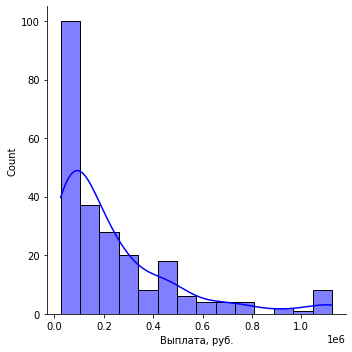

In [ ]:
df_cut = df.drop(df[df['Крупное ДТП'] == 0].index);
x = pd.Series(df_cut['Выплата, руб.'], name = "Выплата, руб.");
sns.displot(x, kde = True, color = 'blue');

Выплата по кпуному ДТП также имеет экспоненциальное распределение, поэтому проверять гипотезу о зависимости VaR от пола в данном случае не имеет смысла, так как результат будет аналогичен результату по легкому ДТП. В данном случае только проведем расчет величин VaR и ES с заданной вероятностью 95%

In [ ]:
mu = np.mean(x);
std_dev = np.std(x);

print(f"МО: {round(mu, 3)}\nСКО: {round(std_dev, 3)}");

МО: 239204.622
СКО: 253767.615


**VaR (95%)**

In [ ]:
VaR_95 = round(np.quantile(x, 0.95), 3);
print(f"VaR_0,95 = {VaR_95}");

VaR_0,95 = 792854.59


Величина, которую не превысит выплата по крупному ДТП с вероятностью 95%, составляет 792854,6 руб., т.е. страховщику необходимо резервировать средства в размере 792854,6 руб. для того, чтобы покрыть среднестатистический убыток при наступлении страховых случаев (в данном случае - крупного ДТП) и сформировать страховые резервы

**ES (95%)**

In [ ]:
CVaR_95 = round(x[x > VaR_95].mean(), 3);
print(f"CVaR_0,95 = {CVaR_95}");

CVaR_0,95 = 1045214.1


Величина возможного ожидаемого убытка страховщика из-за выплат по крупному ДТП в 5% случаев может составлять в среднем 1045214,1 руб., т.е. страховщику необходимо резервировать средства в размере 1045214,1 руб. для покрытия случайных отклонений от среднестатистического убытка от наступления страховых случаев (крупного ДТП) (включая сам среднестатистический убыток) и формирования страховых резервов

**Рисковая надбавка в случае крупного ДТП**

In [ ]:
print(f"Величина рисковой надбавки в случае крупного ДТП составит {CVaR_95} - {VaR_95} = {round(CVaR_95 - VaR_95, 3)} руб.")

Величина рисковой надбавки в случае крупного ДТП составит 1045214.1 - 792854.59 = 252359.51 руб.


*Проверка гипотезы о зависимости величины, которую не превысит выплата по крупному ДТП с вероятностью 95%, от пола:*

In [ ]:
df_cut = df.drop(df[df['Крупное ДТП'] == 0].index);
new_df = pd.DataFrame([df_cut['Пол'], df_cut['Выплата, руб.']]).T;

mu_m = new_df['Выплата, руб.'][new_df['Пол'] == "муж"].mean();
lmbd_m = 1 / mu_m;

mu_w = new_df['Выплата, руб.'][new_df['Пол'] == "жен"].mean();
lmbd_w = 1 / mu_w;

print(f"МО жен = {round(mu_w, 3)}\nМО муж = {round(mu_m, 3)}");

МО жен = 239493.888
МО муж = 239141.483


In [ ]:
rand_nums = [rnd.expovariate(lambd = lmbd_w) for i in range(2000)];
experiment_gender = pd.DataFrame(rand_nums, columns = ['жен']);
experiment_gender['муж'] = [rnd.expovariate(lambd = lmbd_m) for i in range(2000)];
experiment_gender['жен > муж'] = pd.Series();
for i in range(2000):
  experiment_gender['жен > муж'][i] = np.where(experiment_gender['жен'][i] > experiment_gender['муж'][i], 1, 0);
experiment_gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,жен,муж,жен > муж
0,261337.83146,88519.7356804,1
1,556086.119159,733995.3753,0
2,71397.1006608,58990.2187874,1
3,156083.08487,41538.7431675,1
4,417908.561426,235048.892296,1
...,...,...,...
1995,19368.6346067,14965.0153053,1
1996,8671.35725947,272642.654001,0
1997,292206.784968,106827.300894,1
1998,172991.793296,341850.341117,0


In [ ]:
kol_w = experiment_gender['жен > муж'].sum();
print(f"Количество случаев для женщин: {int(kol_w)}\nКоличество случаев для мужчин: {int(2000 - kol_w)}");

Количество случаев для женщин: 1023
Количество случаев для мужчин: 977


Если перезапускать два предыдущих блока кода по новой, будем получать новые наборы из двух тысяч экспоненциально распределенных чисел, однако конечный результат меняться не будет: соотношение случаев для женщин и мужчин всегда равно примерно 50/50

*Проверка гипотезы о зависимости величины, которую не превысит выплата по крупному ДТП с вероятностью 95%, от типа страхования (частичное/полное):*

In [ ]:
df_cut = df.drop(df[df['Крупное ДТП'] == 0].index);
new_df = pd.DataFrame([df_cut['Тип страхования'], df_cut['Выплата, руб.']]).T;

mu_ps = new_df['Выплата, руб.'][new_df['Тип страхования'] == "частичное"].mean();
lmbd_ps = 1 / mu_ps;

mu_fs = new_df['Выплата, руб.'][new_df['Тип страхования'] == "полное"].mean();
lmbd_fs = 1 / mu_fs;

print(f"МО частичное = {round(mu_ps, 3)}\nМО полное = {round(mu_fs, 3)}");

МО частичное = 220224.116
МО полное = 275776.816


In [ ]:
rand_nums = [rnd.expovariate(lambd = lmbd_ps) for i in range(2000)];
experiment_insurance = pd.DataFrame(rand_nums, columns = ['частичное']);
experiment_insurance['полное'] = [rnd.expovariate(lambd = lmbd_fs) for i in range(2000)];
experiment_insurance['частичное > полное'] = pd.Series();
for i in range(2000):
  experiment_insurance['частичное > полное'][i] = np.where(experiment_insurance['частичное'][i] > experiment_insurance['полное'][i], 1, 0);
experiment_insurance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,частичное,полное,частичное > полное
0,205888.9259,125556.652053,1
1,138977.829668,464387.44693,0
2,133038.276629,794106.417349,0
3,21764.3731467,121185.22529,0
4,7054.35016014,40981.6423352,0
...,...,...,...
1995,172558.435776,194191.203404,0
1996,210675.909588,323335.410511,0
1997,58588.1341204,113634.044336,0
1998,31130.6062225,11504.290098,1


In [ ]:
kol_ps = experiment_insurance['частичное > полное'].sum();
print(f"Количество случаев для частичного типа страхования: {int(kol_ps)}\nКоличество случаев для полного типа страхования: {int(2000 - kol_ps)}");

Количество случаев для частичного типа страхования: 895
Количество случаев для полного типа страхования: 1105


Если перезапускать два предыдущих блока кода по новой, будем получать новые наборы из двух тысяч экспоненциально распределенных чисел, однако конечный результат меняться не будет: соотношение случаев для частичного типа страхования и полного типа страхования всегда равно примерно 45/55. При крупном ДТП наиболее вероятен убыток в размере 792854,6 руб., если в данном случае был применен полный тип страхования, т.е. при крупном ДТП наблюдается слабая зависимость величины риска (убытка страховщика) от типа страхования: риск больше при полном типе страхования.

**VaR, ES (угон, ДТП без восстановления авто)**

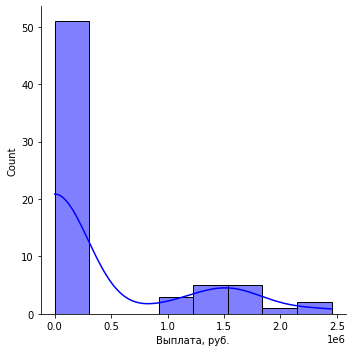

In [ ]:
df_cut = df.drop(df[df['Угон, ДТП без востановления авто'] == 0].index);
x = pd.Series(df_cut['Выплата, руб.'], name = "Выплата, руб.");
sns.displot(x, kde = True, color = 'blue');

Выплата по угону, ДТП без восстановления авто также имеет экспоненциальное распределение, поэтому проверять гипотезу о зависимости VaR от пола в данном случае не имеет смысла, так как результат будет аналогичен результату по легкому ДТП. В данном случае только проведем расчет величин VaR и ES с заданной вероятностью 95%

In [ ]:
mu = np.mean(x);
std_dev = np.std(x);

print(f"МО: {round(mu, 3)}\nСКО: {round(std_dev, 3)}");

МО: 371385.245
СКО: 689102.019


**VaR (95%)**

In [ ]:
VaR_95 = round(np.quantile(x, 0.95), 3);
print(f"VaR_0,95 = {VaR_95}");

VaR_0,95 = 1624311.97


Величина, которую не превысит выплата по угону/ДТП без восстановления авто с вероятностью 95%, составляет 1624312 руб., т.е. страховщику необходимо резервировать средства в размере 1624312 руб. для того, чтобы покрыть среднестатистический убыток при наступлении страховых случаев (в данном случае - угона/ДТП без восстановления авто) и сформировать страховые резервы

**ES (95%)**

In [ ]:
CVaR_95 = round(x[x > VaR_95].mean(), 3);
print(f"CVaR_0,95 = {CVaR_95}");

CVaR_0,95 = 2050644.35


Величина возможного ожидаемого убытка страховщика из-за выплат по угону/ДТП без восстановления авто в 5% случаев может составлять в среднем 2050644,4 руб., т.е. страховщику необходимо резервировать средства в размере 2050644,4 руб. для покрытия случайных отклонений от среднестатистического убытка от наступления страховых случаев (угона/ДТП без восстановления авто) (включая сам среднестатистический убыток) и формирования страховых резервов

**Рисковая надбавка в случае угона/ДТП без восстановления авто**

In [ ]:
print(f"Величина рисковой надбавки в случае крупного ДТП составит {CVaR_95} - {VaR_95} = {round(CVaR_95 - VaR_95, 3)} руб.")

Величина рисковой надбавки в случае крупного ДТП составит 2050644.35 - 1624311.97 = 426332.38 руб.


*Проверка гипотезы о зависимости величины, которую не превысит выплата по угону/ДТП без восстановления авто с вероятностью 95%, от пола:*

In [ ]:
df_cut = df.drop(df[df['Угон, ДТП без востановления авто'] == 0].index);
new_df = pd.DataFrame([df_cut['Пол'], df_cut['Выплата, руб.']]).T;

mu_m = new_df['Выплата, руб.'][new_df['Пол'] == "муж"].mean();
lmbd_m = 1 / mu_m;

mu_w = new_df['Выплата, руб.'][new_df['Пол'] == "жен"].mean();
lmbd_w = 1 / mu_w;

print(f"МО жен = {round(mu_w, 3)}\nМО муж = {round(mu_m, 3)}");

МО жен = 648658.54
МО муж = 291402.563


In [ ]:
rand_nums = [rnd.expovariate(lambd = lmbd_w) for i in range(2000)];
experiment_gender = pd.DataFrame(rand_nums, columns = ['жен']);
experiment_gender['муж'] = [rnd.expovariate(lambd = lmbd_m) for i in range(2000)];
experiment_gender['жен > муж'] = pd.Series();
for i in range(2000):
  experiment_gender['жен > муж'][i] = np.where(experiment_gender['жен'][i] > experiment_gender['муж'][i], 1, 0);
experiment_gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,жен,муж,жен > муж
0,56459.0278161,13982.9922556,1
1,774129.648815,70292.0253958,1
2,527796.316653,191228.820346,1
3,2041016.16665,462264.090255,1
4,26876.8443907,426148.028601,0
...,...,...,...
1995,1159981.28643,207760.392182,1
1996,213919.821177,62629.8860575,1
1997,783837.536553,381901.702392,1
1998,798431.951172,50955.6281653,1


In [ ]:
kol_w = experiment_gender['жен > муж'].sum();
print(f"Количество случаев для женщин: {int(kol_w)}\nКоличество случаев для мужчин: {int(2000 - kol_w)}");

Количество случаев для женщин: 1377
Количество случаев для мужчин: 623


Если перезапускать два предыдущих блока кода по новой, будем получать новые наборы из двух тысяч экспоненциально распределенных чисел, однако конечный результат меняться не будет: соотношение случаев для женщин и мужчин всегда равно примерно 70/30. При угоне/ДТП без восстановления авто наиболее вероятен убыток в размере 1624311,97 руб., если данный страховой случай связан с лицом женского пола, т.е. при угоне/ДТП без восстановления авто наблюдается некоторая зависимость величины риска (убытка страховщика) от пола гражданина: риск больше для страховых случаев, связанных с лицами женского пола.

Посчитаем соотношение кол-ва женщин и кол-ва мужчин, имеющих топ-5 автомобилей по частоте угона/ДТП без восстановления авто, с которыми произошел данный страховой случай.

In [ ]:
auto_list = ["KIA Rio", "Hyundai Solaris", "Lada Vesta", "Renault Sandero", "Lada X-Ray"]
s_w = np.count_nonzero(df[(df['Марка автомобиля'].isin(auto_list) == True) & (df['Пол'] == "жен") & (df['Угон, ДТП без востановления авто'] == 1)]['Пол']);
s_m = np.count_nonzero(df[(df['Марка автомобиля'].isin(auto_list) == True) & (df['Пол'] == "муж") & (df['Угон, ДТП без востановления авто'] == 1)]['Пол']);

print(f"Количество мужчин, владеющих топ-5 авто по угону/ДТП без восстановления авто: {s_m}\nКоличество женщин, владеющих топ-5 авто по угону/ДТП без восстановления авто: {s_w}");

Количество мужчин, владеющих топ-5 авто по угону/ДТП без восстановления авто: 26
Количество женщин, владеющих топ-5 авто по угону/ДТП без восстановления авто: 8


Величина риска при угоне/ДТП без восстановления авто зависит от пола гражданина, но не обусловлена тем, что женщины владеют бОльшим числом автомобилей из топ-5 по угону/ДТП без восстановления авто, чем мужчины.

Проверим влияние стажа вождения на данное соотношение.

In [ ]:
s_w = np.mean(df[(df['Угон, ДТП без востановления авто'] == 1) & (df['Пол'] == "жен")]['Стаж вождения']);
s_m = np.mean(df[(df['Угон, ДТП без востановления авто'] == 1) & (df['Пол'] == "муж")]['Стаж вождения']);

print(f"Для мужчин, у которых угоняли авто/попадавших в ДТП без восстановления авто, средний стаж: {int(s_m)}\nДля женщин, у которых угоняли авто/попадавших в ДТП без восстановления авто, средний стаж: {int(s_w)}");

Для мужчин, у которых угоняли авто/попадавших в ДТП без восстановления авто, средний стаж: 21
Для женщин, у которых угоняли авто/попадавших в ДТП без восстановления авто, средний стаж: 25


Величина риска при угоне/ДТП без восстановления авто зависит от пола гражданина, но не обусловлена тем, что женщины имели меньший стаж вождения, чем мужчины.

Тип страхования на данное соотношение не влияет, поскольку в случае угона/ДТП без восстановления авто доступен только полный тип страхования. Для проверки соотношения не хватает данных.

*Проверка гипотезы о зависимости величины, которую не превысит выплата по угону/ДТП без восстановления авто с вероятностью 95%, от типа страхования (частичное/полное):*

In [ ]:
df_cut = df.drop(df[df['Угон, ДТП без востановления авто'] == 0].index);
new_df = pd.DataFrame([df_cut['Тип страхования'], df_cut['Выплата, руб.']]).T;

mu_ps = new_df['Выплата, руб.'][new_df['Тип страхования'] == "частичное"].mean();
lmbd_ps = 1 / mu_ps; # деление на 0

mu_fs = new_df['Выплата, руб.'][new_df['Тип страхования'] == "полное"].mean();
lmbd_fs = 1 / mu_fs;

print(f"МО частичное = {round(mu_ps, 3)}\nМО полное = {round(mu_fs, 3)}");

МО частичное = 0.0
МО полное = 1555175.712


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


МО для выплат по частичному типу страхования равно 0, что говорит о том, что частичное страхование не используется для случаев угона/ДТП без восстановления авто. Дальнейшие действия проводить бессмысленно. Соотношение случаев для частичного типа страхования и полного типа страхования всегда будет 0/100